# Dave is doing his homework on the balcony and, preparing a presentation about Pythagorean triangles, has just cut out a triangle with side lengths 30cm, 40cm and 50cm from some cardboard, when a gust of wind blows the triangle down into the garden.

# Another gust blows a small ant straight onto this triangle. The poor ant is completely disoriented and starts to crawl straight ahead in random direction in order to get back into the grass.

# Assuming that all possible positions of the ant within the triangle and all possible directions of moving on are equiprobable, what is the probability that the ant leaves the triangle along its longest side?

# Give your answer rounded to 10 digits after the decimal point.

_______

# Since $50^{2} = 2500 = 900 + 1600 = 30^{2} + 40^{2}$, we know that this triangle is a right angle triangle

# Let's see what the triangle looks like

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
plt.rcParams['figure.figsize'] = 10, 10

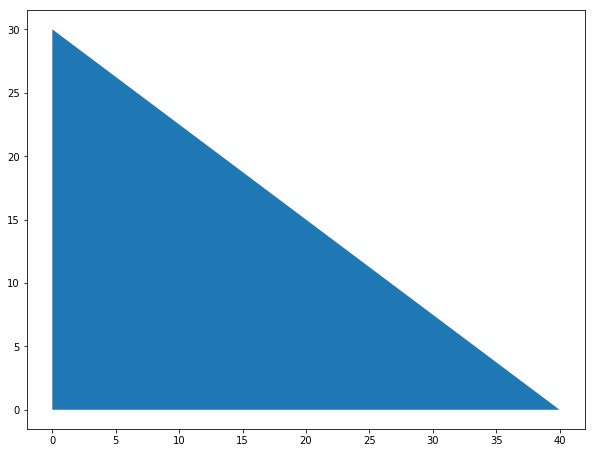

In [30]:
x = np.arange(0, 40.01, 0.01)
y = 30 - x*(30/40.0)
plt.gca().set_aspect('equal')
plt.fill_between(x,y,0)

# Now, let's assume an ant falls onto a random spot on the triangle

### We can assume the random spot is 5, 10

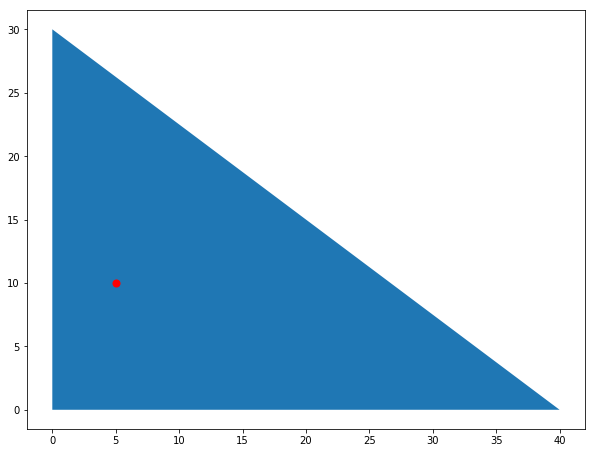

In [35]:
random_x, random_y = 5, 10
x = np.arange(0, 40.01, 0.01)
y = 30 - x*(30/40.0)
plt.gca().set_aspect('equal')
plt.fill_between(x,y,0)
plt.scatter(random_x, random_y, s=50, facecolors='r', marker = 'o')
plt.show()

# Now, we visualize a circle surrounding the ant, and draw lines from the ant to each vertex

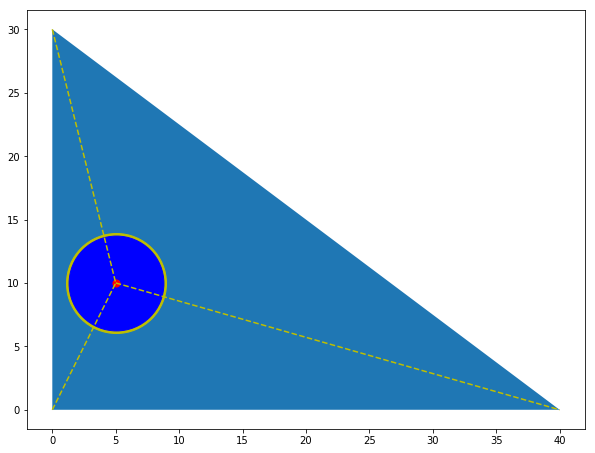

In [53]:
random_x, random_y = 5, 10
x = np.arange(0, 40.01, 0.01)
y = 30 - x*(30/40.0)
plt.gca().set_aspect('equal')
plt.fill_between(x,y,0)
plt.scatter(random_x, random_y, s=10000, facecolors='y', marker = 'o')
plt.scatter(random_x, random_y, s=9000, facecolors='b', marker = 'o')
plt.scatter(random_x, random_y, s=50, facecolors='r', marker = 'o')

x_left = np.arange(0,random_x+0.01, 0.01)
y1 = 30 - 4*x_left
plt.plot(x_left, y1, color = 'y', ls = 'dashed')
y2 = 2*x_left
plt.plot(x_left, y2, color = 'y', ls = 'dashed')

x_right = np.arange(random_x, 40.01, 0.01)
y3 = (80 - 2*x_right)/7.0
plt.plot(x_right, y3, color = 'y', ls = 'dashed')

plt.show()

# Since the ant walks in a random direction, the probability that it walks off the longest edge is equal to the proportion of the circumference of the circle in the top right section

# Let's choose another random point to show how this ratio can change

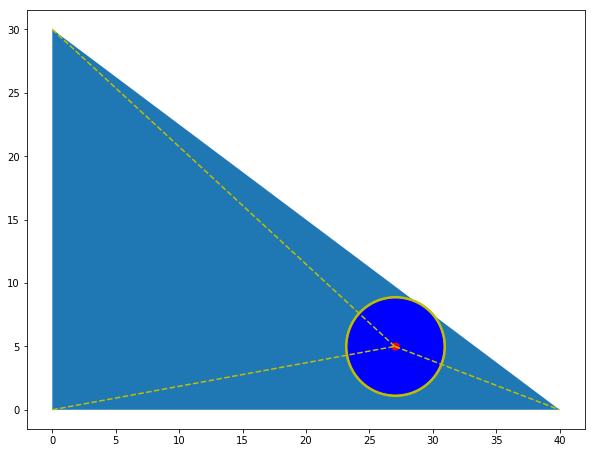

In [67]:
random_x, random_y = 27, 5
x = np.arange(0, 40.01, 0.01)
y = 30 - x*(30/40.0)
plt.gca().set_aspect('equal')
plt.fill_between(x,y,0)
plt.scatter(random_x, random_y, s=10000, facecolors='y', marker = 'o')
plt.scatter(random_x, random_y, s=9000, facecolors='b', marker = 'o')
plt.scatter(random_x, random_y, s=50, facecolors='r', marker = 'o')

x_left = np.arange(0,random_x+0.01, 0.01)
y1 = 30 - ((30-random_y)/(random_x))*x_left
plt.plot(x_left, y1, color = 'y', ls = 'dashed')
y2 = (random_y/random_x)*x_left
plt.plot(x_left, y2, color = 'y', ls = 'dashed')

x_right = np.arange(random_x, 40.01, 0.01)
m = (-random_y)/(40-random_x)
b = random_y-(m*random_x)
y3 = b + m*x_right
plt.plot(x_right, y3, color = 'y', ls = 'dashed')

plt.show()

# We can solve for the proportion by calculating four angles

![](images/613.png)

# We can calculate these angles as

## 1. $\tan\left ( \text{Angle 1} \right ) = \frac{30 - random_{y}}{random_x}$

## 2. $\tan\left ( \text{Angle 2} \right ) = \frac{random_{y}}{random_{x}}$

## 3. $\tan\left ( \text{Angle 3} \right ) = \frac{random_{x}}{random_{y}}$

## 4. $\tan\left ( \text{Angle 4} \right ) = \frac{40 - random_{x}}{random_{y}}$

# Then, we take the sum and divide by $2\pi$ to get the probability of not walking off the long side

# Recall: $\tan(a+b) = \frac{\tan(a) + \tan(b)}{1 - \tan(a)\cdot \tan(b)}$

## So, to avoid rounding errors, we can calculate:

## $\alpha = a+b \implies \tan(\alpha) = \tan(a+b) = \frac{\tan(a) + \tan(b)}{1 - \tan(a)\cdot \tan(b)}$

## $\beta = c+d \implies \tan(\beta) = \tan(c+d) = \frac{\tan(c) + \tan(d)}{1 - \tan(c)\cdot \tan(d)}$

### $\gamma = \alpha + \beta = a+b+c+d \implies \tan(a+b+c+d) = \frac{\tan(\alpha) + \tan(\beta)}{1 - \tan(\alpha)\cdot \tan(\beta)}$

# Therefore

$$
\tan\left ( \text{Angle 1}+\text{Angle 2} \right ) = \frac{\frac{30-x}{x} + \frac{y}{x}}{1 - \frac{30-x}{x}\cdot \frac{y}{x}} = \frac{30x}{x^{2} - 30y + y^{2}}
$$

$$
\tan\left ( \text{Angle 3}+\text{Angle 4} \right ) = \frac{40y}{x^{2} - 40x + y^{2}}
$$

# And putting it all together...

$$
\tan\left ( \text{Angle 1}+\text{Angle 2}+\text{Angle 3}+\text{Angle 4} \right ) = \frac{\frac{30x}{x^{2} - 30y + y^{2}} + \frac{40y}{x^{2} - 40x + y^{2}}}{1 - \frac{30x}{x^{2} - 30y + y^{2}} \cdot \frac{40y}{x^{2} - 40x + y^{2}}}
$$

$$
= \frac{30x \left ( x^{2} - 40x + y^{2} \right ) + 40y \left (x^{2} - 30y + y^{2} \right )}{\left ( x^{2} - 30y + y^{2} \right )\left (x^{2} - 40x + y^{2}\right ) - 120xy}
$$

In [149]:
def solve_tan_angle(x,y):    
    term1 = x**2 - 40*x + y**2
    term2 = x**2 - 30*y + y**2
    n = 30*x*term1 + 40*y*term2
    d = term1*term2-120*x*y
    return np.arctan(n/d)

In [148]:
import scipy.integrate as integrate

# Now, let's try iterating over all possible landing spots on the surface of the triangle

In [145]:
step = 0.01

for x in np.arange(0, 40, step):
    
    if x == 0:
        x += 0.000000000000001
    
    y_max = 30 - 0.75*x
    
    if y_max == 0:
        y_max += 0.000000000000001
    
    result = np.integrate()
    
    x_array = np.concatenate([x_array, x_array_temp])
    y_array = np.concatenate([y_array, y_array_temp])

KeyboardInterrupt: 

In [142]:
sum([np.arctan(x) for x in list_results])/sum([len(x) for x in list_results])

KeyboardInterrupt: 

In [136]:
np.arctan()

AttributeError: 'numpy.ndarray' object has no attribute 'arctan'

In [111]:
list_results[0].size + list_results[1].size

6000

In [95]:
round(0.39164877114512353, 10)

0.3916487711

In [93]:
atan(0)

0.0